# Machine Learning for Heart Disease Prediction

## Table of Contents
1. Introduction
2. Data Loading and Exploration
3. Data Cleaning and Feature Engineering
4. Exploratory Data Analysis (EDA)
5. Model Selection and Training
6. Model Evaluation
7. Ensemble Models
8. Model Comparison
9. Conclusion

## 1. Introduction

The goal of this project is to predict whether a patient has heart disease based on their medical attributes. Accurate predictions can help in early diagnosis and treatment, potentially saving lives.

**Question**: Can we predict the presence of heart disease based on patient data such as age, sex, cholesterol levels, and other health indicators?

## 2. Data Loading and Exploration

We will use the Heart Disease dataset which contains various medical attributes of patients. The dataset includes features like age, sex, cholesterol levels, and the presence of heart disease.

First, let's import the necessary libraries and load the data.

In [9]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import numpy as np
from IPython.display import display, Markdown

# Load the data
data = pd.read_csv('datasets/heart.csv')
df = pd.DataFrame(data)
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Data Summary

Let's explore the dataset to understand its structure and summarize its main characteristics.

In [10]:
# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  
Age               0
Sex               0
ChestPainType     0
Res

## 3. Data Cleaning and Feature Engineering

Real-world data is often messy. We need to clean the data by addressing missing values and outliers. Feature engineering involves selecting and transforming the relevant features to improve model performance.

In [11]:
# Encode categorical data
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Check for zero and NaN values
for col in df.columns:
    print(f"{col} has zero values: {0 in df[col].values}")
    amount_of_nan = df[col].isnull().sum()
    print(f"{col} has {amount_of_nan} NaN values")

    if amount_of_nan > 0:
        df[col] = df[col].fillna(0)
        print(f'Replaced NaN values with zeros in {col}')

# Separate target variable and features
y = df['HeartDisease']
X = df.drop('HeartDisease', axis=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Age has zero values: False
Age has 0 NaN values
Sex has zero values: True
Sex has 0 NaN values
ChestPainType has zero values: True
ChestPainType has 0 NaN values
RestingBP has zero values: True
RestingBP has 0 NaN values
Cholesterol has zero values: True
Cholesterol has 0 NaN values
FastingBS has zero values: True
FastingBS has 0 NaN values
RestingECG has zero values: True
RestingECG has 0 NaN values
MaxHR has zero values: False
MaxHR has 0 NaN values
ExerciseAngina has zero values: True
ExerciseAngina has 0 NaN values
Oldpeak has zero values: True
Oldpeak has 0 NaN values
ST_Slope has zero values: True
ST_Slope has 0 NaN values
HeartDisease has zero values: True
HeartDisease has 0 NaN values


## 4. Exploratory Data Analysis (EDA)

We will visualize the relationships in the data using a heatmap and a pairplot to understand the correlations and distributions.

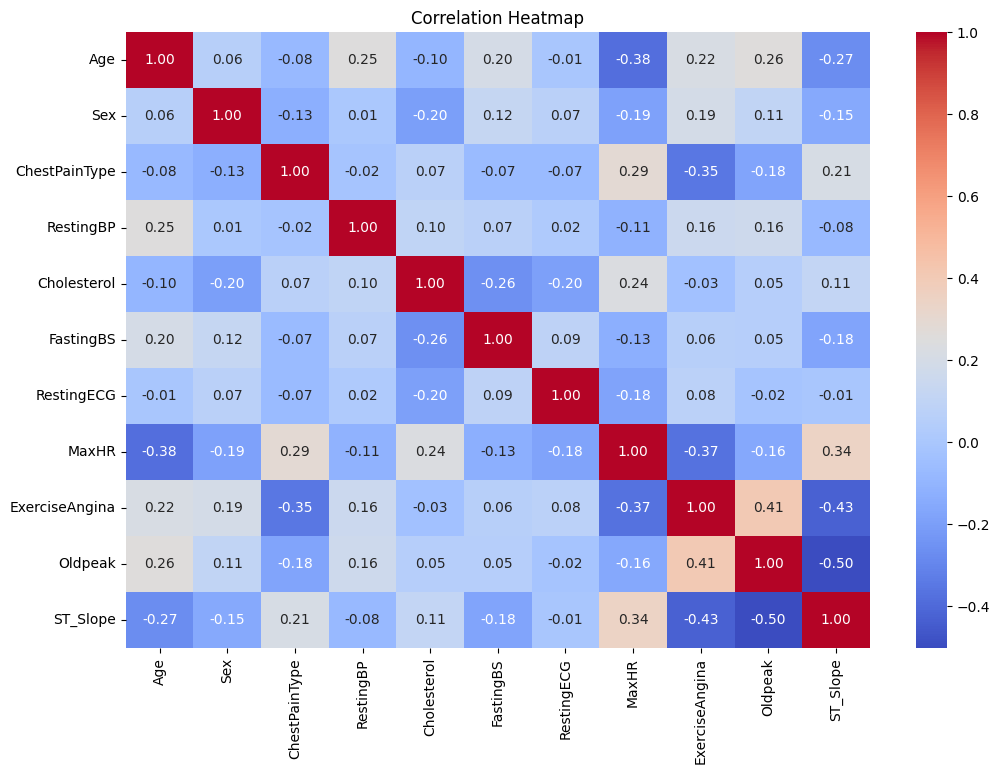

<Figure size 1400x1000 with 0 Axes>

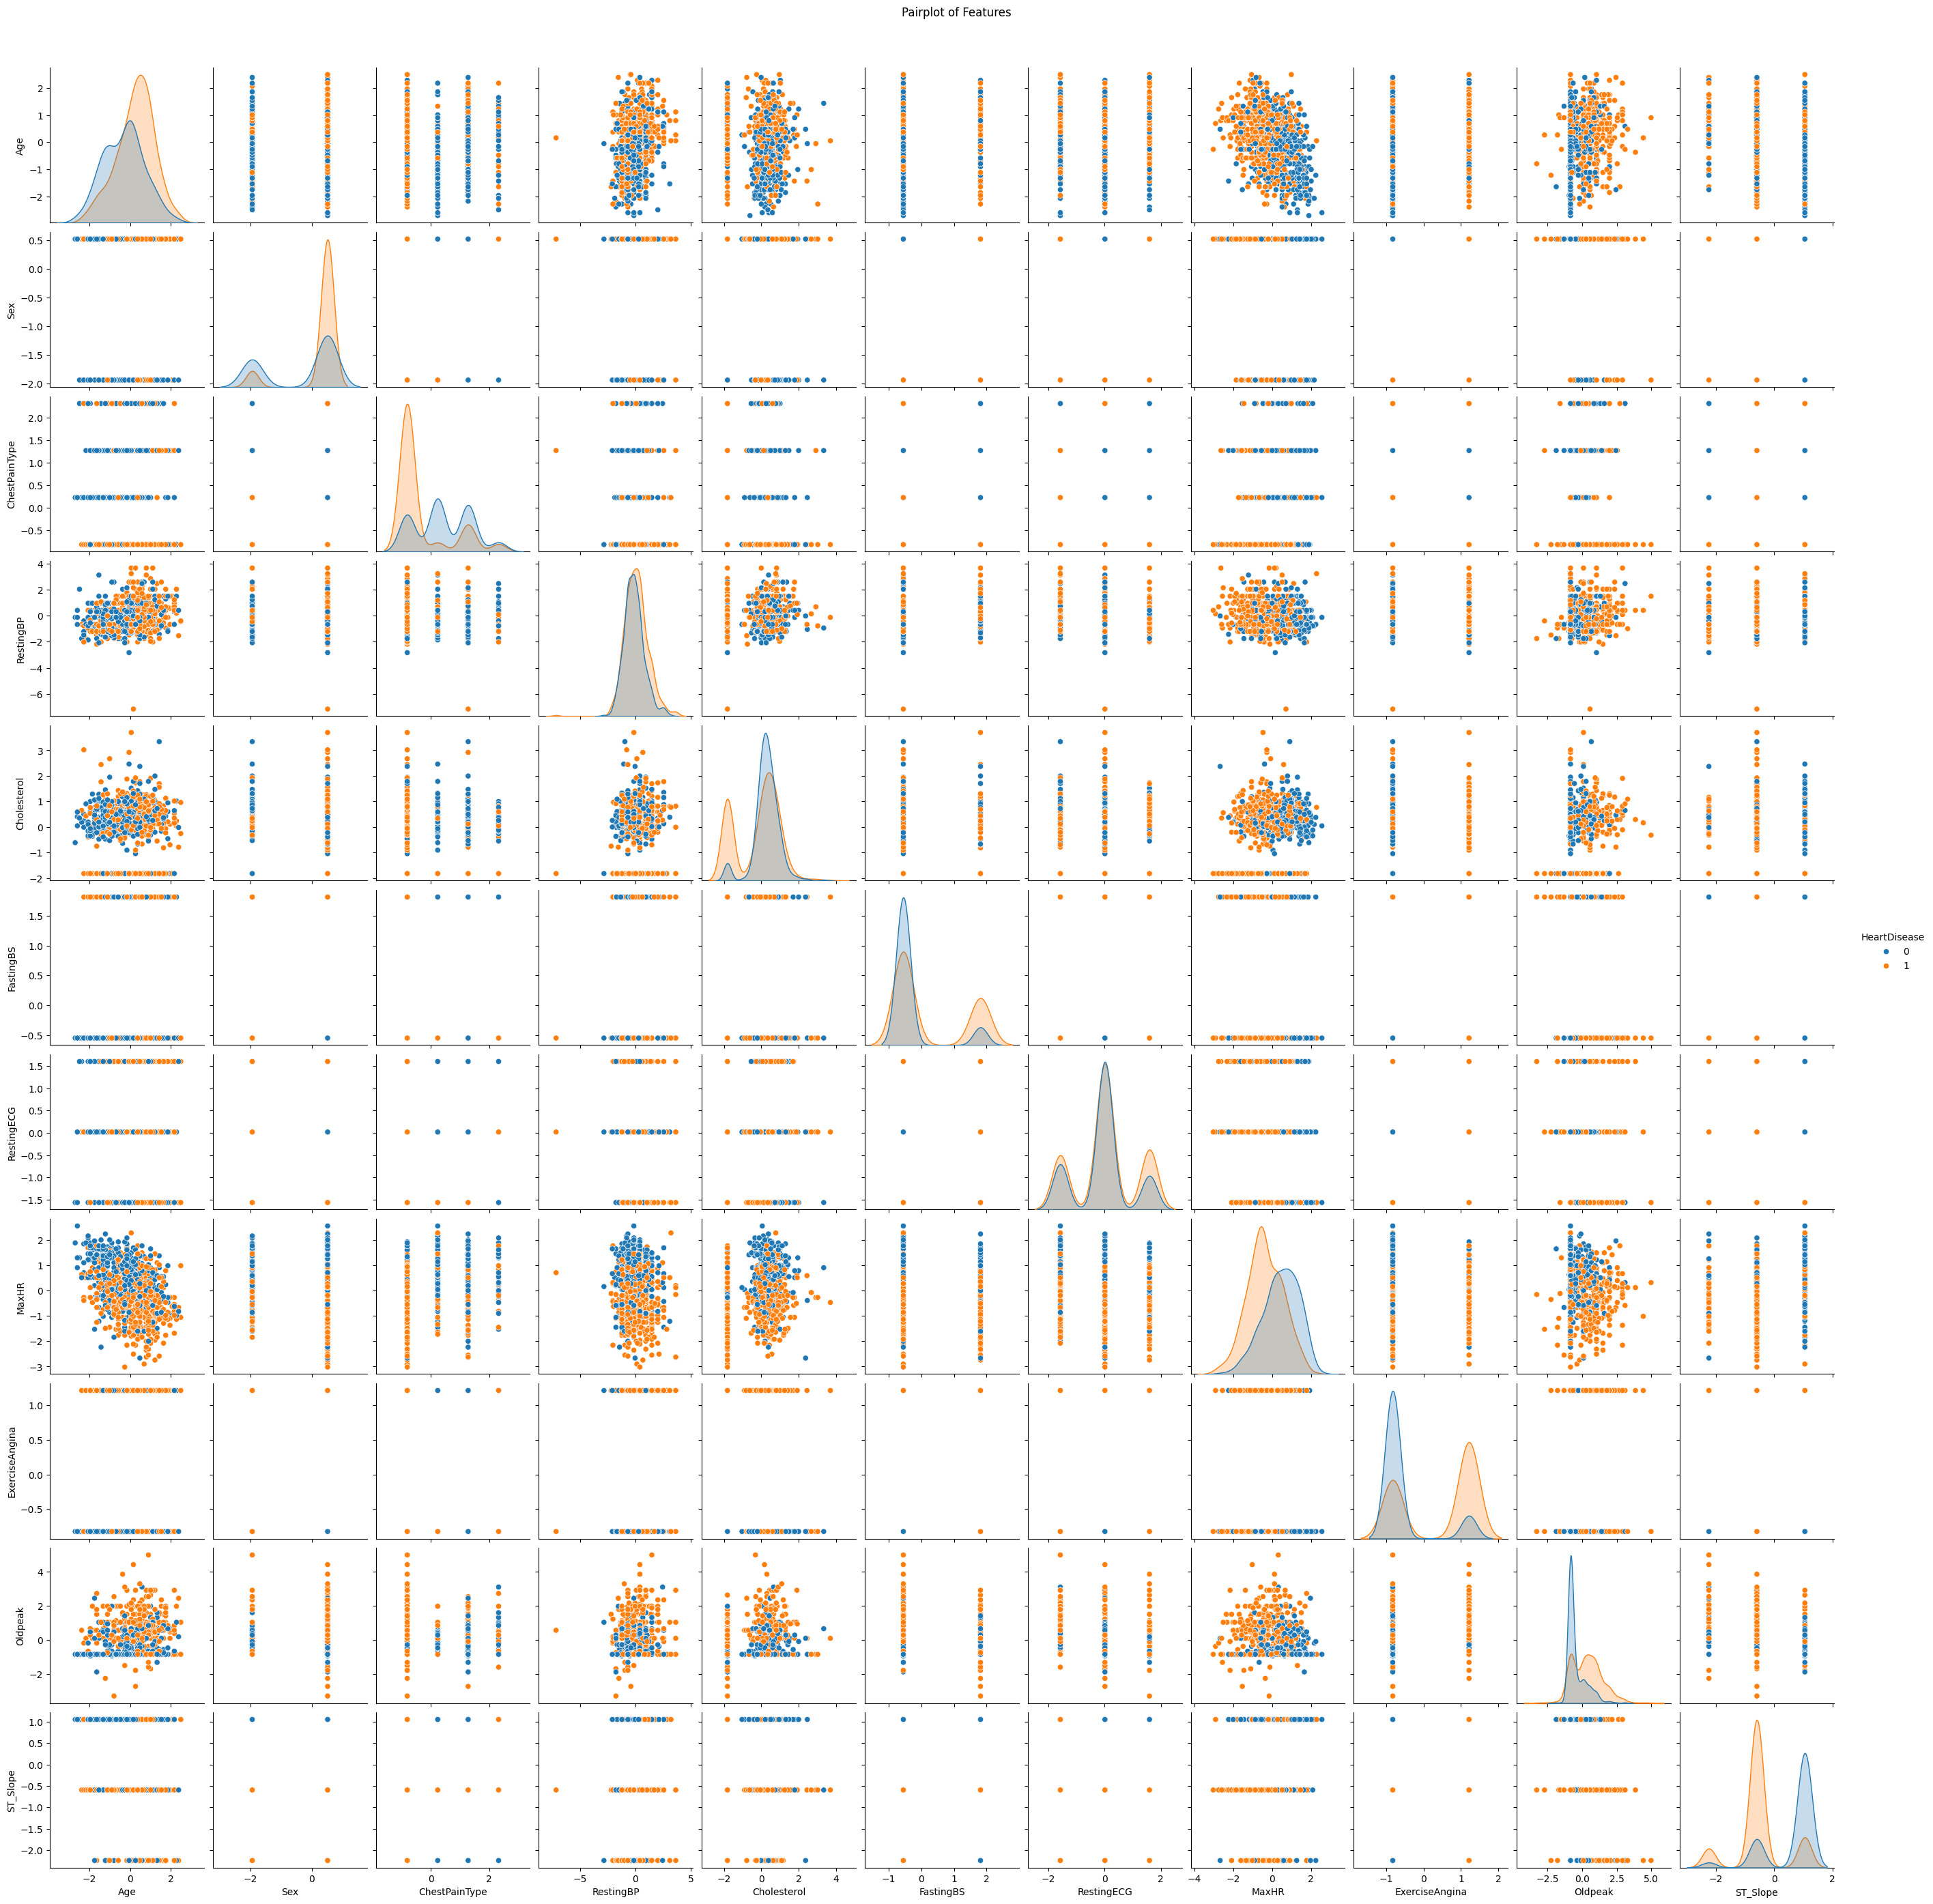

In [12]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Add target variable back to the scaled dataframe for pairplot
df_scaled['HeartDisease'] = y.values

# Pairplot to visualize relationships
plt.figure(figsize=(14, 10))
sns.pairplot(df_scaled, hue='HeartDisease', diag_kind='kde')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

## 5. Model Selection and Training

Based on our understanding of the problem and the dataset, we'll use two different models for comparison: Logistic Regression and Decision Tree. Logistic Regression is suitable for binary classification, while Decision Tree can handle non-linear relationships.

In [13]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Create and train Decision Tree model
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

## 6. Model Evaluation

We will evaluate the models using accuracy, confusion matrix, and classification report. This will help us understand how well the models perform and if there's any room for improvement.

### Logistic Regression Results:
- Accuracy: 0.8478260869565217
- ROC AUC: 0.90

### Decision Tree Results:
- Accuracy: 0.8641304347826086
- ROC AUC: 0.86

**Logistic Regression Accuracy:** 0.8478260869565217

**Logistic Regression Confusion Matrix:**

```
[[68  9]
 [19 88]]
```

**Logistic Regression Classification Report:**

```
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

```

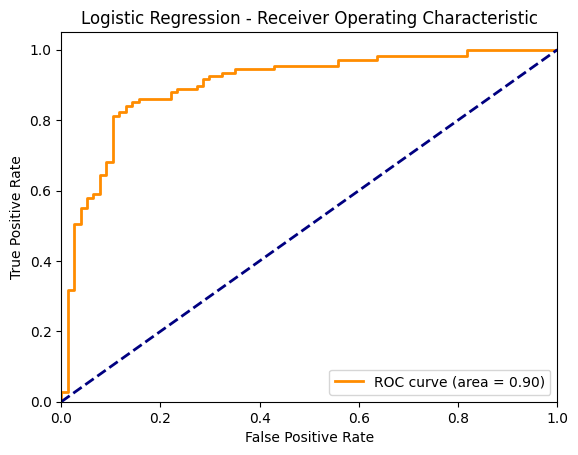

**Decision Tree Accuracy:** 0.8641304347826086

**Decision Tree Confusion Matrix:**

```
[[68  9]
 [16 91]]
```

**Decision Tree Classification Report:**

```
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        77
           1       0.91      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

```

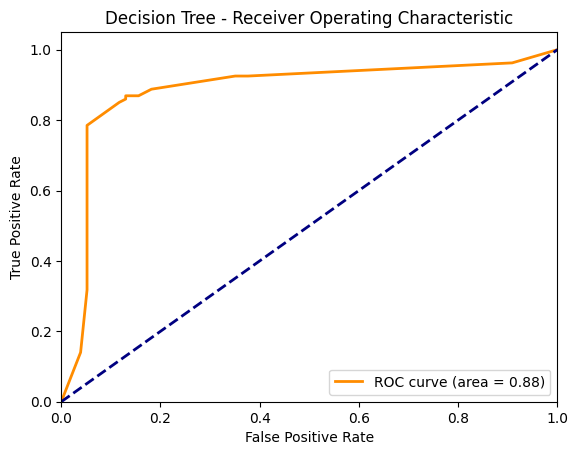

In [14]:
from sklearn.metrics import roc_curve, auc

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    display(Markdown(f"**{model_name} Accuracy:** {accuracy}"))
    display(Markdown(f"**{model_name} Confusion Matrix:**"))
    display(Markdown(f"```\n{conf_matrix}\n```"))
    display(Markdown(f"**{model_name} Classification Report:**"))
    display(Markdown(f"```\n{class_report}\n```"))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Evaluate Logistic Regression
evaluate_model(logreg, X_test, y_test, "Logistic Regression")

# Evaluate Decision Tree
evaluate_model(tree, X_test, y_test, "Decision Tree")

## 7. Ensemble Models

We will create and train two ensemble models: a Random Forest and a Voting Classifier that combines Logistic Regression and Decision Tree.

### Random Forest Results:
- Accuracy: 0.8804347826086957
- ROC AUC: 0.94

### Voting Classifier Results:
- Accuracy: 0.8532608695652174
- ROC AUC: 0.91

**Random Forest Accuracy:** 0.8804347826086957

**Random Forest Confusion Matrix:**

```
[[66 11]
 [11 96]]
```

**Random Forest Classification Report:**

```
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        77
           1       0.90      0.90      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184

```

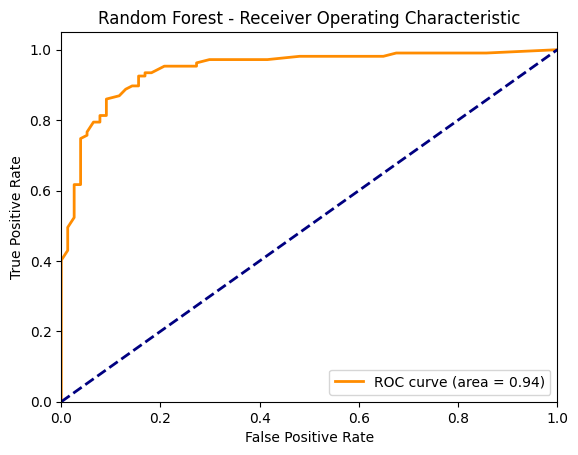

**Voting Classifier Accuracy:** 0.8532608695652174

**Voting Classifier Confusion Matrix:**

```
[[66 11]
 [16 91]]
```

**Voting Classifier Classification Report:**

```
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        77
           1       0.89      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184

```

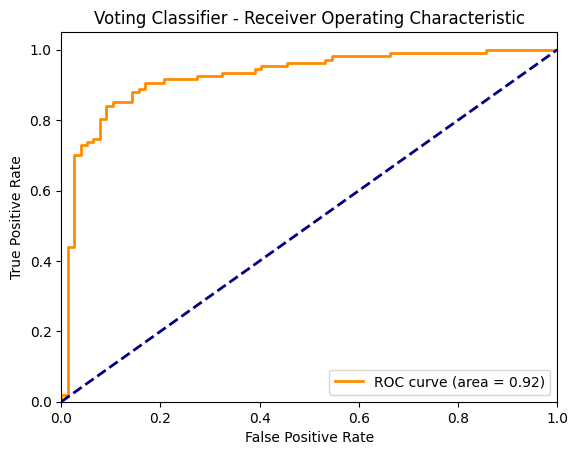

In [15]:
# Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

# Voting Classifier (combining Logistic Regression and Decision Tree)
voting_clf = VotingClassifier(estimators=[('lr', logreg), ('dt', tree)], voting='soft')
voting_clf.fit(X_train, y_train)

# Evaluate Random Forest
evaluate_model(random_forest, X_test, y_test, "Random Forest")

# Evaluate Voting Classifier
evaluate_model(voting_clf, X_test, y_test, "Voting Classifier")

## 8. Model Comparison

We will compare the performance of all models (Logistic Regression, Decision Tree, Random Forest, and Voting Classifier).

In [16]:
models = {
    "Logistic Regression": logreg,
    "Decision Tree": tree,
    "Random Forest": random_forest,
    "Voting Classifier": voting_clf
}

results = {
    "Model": [],
    "Accuracy": [],
    "Precision (Class 0)": [],
    "Recall (Class 0)": [],
    "F1-score (Class 0)": [],
    "Precision (Class 1)": [],
    "Recall (Class 1)": [],
    "F1-score (Class 1)": []
}

for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    results["Model"].append(name)
    results["Accuracy"].append(accuracy)
    results["Precision (Class 0)"].append(report['0']['precision'])
    results["Recall (Class 0)"].append(report['0']['recall'])
    results["F1-score (Class 0)"].append(report['0']['f1-score'])
    results["Precision (Class 1)"].append(report['1']['precision'])
    results["Recall (Class 1)"].append(report['1']['recall'])
    results["F1-score (Class 1)"].append(report['1']['f1-score'])

results_df = pd.DataFrame(results)
display(results_df)

,Model,Accuracy,Precision (Class 0),Recall (Class 0),F1-score (Class 0),Precision (Class 1),Recall (Class 1),F1-score (Class 1)
0,Logistic Regression,0.847826,0.781609,0.883117,0.829268,0.907216,0.822430,0.862745
1,Decision Tree,0.864130,0.809524,0.883117,0.844720,0.910000,0.850467,0.879227
2,Random Forest,0.880435,0.857143,0.857143,0.857143,0.897196,0.897196,0.897196
3,Voting Classifier,0.853261,0.804878,0.857143,0.830189,0.892157,0.850467,0.870813


## 9. Conclusion

Based on the given results:

1. The Random Forest model achieved the highest accuracy (88.04%) among the classifiers evaluated. It also exhibited balanced performance across both classes, with high precision and recall for both class 0 and class 1.

2. The Decision Tree model performed second-best with an accuracy of 86.41%, showing good balance between precision and recall for both classes.

3. The Voting Classifier, which combined Logistic Regression and Decision Tree, performed slightly better than Logistic Regression alone but not as well as the individual Decision Tree or Random Forest models.

4. Logistic Regression, while having the lowest accuracy (84.78%), still performed reasonably well and might be preferred if model interpretability is a priority.

5. All models showed good discrimination ability with ROC AUC scores ranging from 0.86 to 0.94, with Random Forest having the highest AUC of 0.94.

In conclusion, the Random Forest model appears to be the most suitable for this heart disease prediction task, offering the best balance of accuracy and performance across classes. However, the choice of model might also depend on other factors such as computational efficiency, interpretability needs, and specific requirements of the medical application.

Future work could involve:
1. Feature importance analysis to understand which factors contribute most to heart disease prediction.
2. Hyperparameter tuning to potentially improve model performance further.
3. Exploring other advanced models or ensemble techniques.
4. Collecting more data or incorporating additional relevant features if available.